In [69]:

import pandas as pd 
lkd = pd.read_csv('Aditya_Connections.csv')
lkd


,First Name,Last Name,Email Address,Company,Position,Connected On
0,Ivanshu,Patil,NaN,Serverwala Cloud Data Center Pvt. Ltd.,Server Manager,01-Sep-21
1,Harshvardhan,Tambe,NaN,Sngeo Pvt Ltd,Student Intern,01-Sep-21
2,Ishwari,Niphade,NaN,NaN,NaN,31-Aug-21
3,Gauri,kandekar,NaN,NaN,NaN,26-Aug-21
4,Aditya,Patil,NaN,NaN,NaN,25-Aug-21
...,...,...,...,...,...,...
106,Shriyash,Borhade,NaN,Freelance,Commercial Photographer,28-Aug-20
107,Sayali,Nikam,NaN,ŠKODA AUTO Volkswagen India Private Limited,Project Intern,27-Aug-20
108,AMAN,DHATTARWAL,NaN,Hustlers Bay,Founder,27-Aug-20
109,Pratima,Shinde,NaN,Hindustan Aeronautics Limited,Intern,26-Aug-20


In [70]:
lkd.shape

(111, 6)

In [71]:
#How is My Connection Activity Overtime
lkd=lkd.sort_values(by='Connected On')

import plotly.express as px

px.line(lkd.groupby(by='Connected On').count().reset_index(),
        x='Connected On',
        y='First Name',
        labels={'First Name':'Number of Connections'},
        title = 'Connection Timeline')

In [72]:
 #where do my connections work
lkd['Company']


68    Rajdeep Study Abroad Consultants, Nashik
67                                   Freelance
22                             Reliance Retail
86                                  Dator Tech
0       Serverwala Cloud Data Center Pvt. Ltd.
                        ...                   
69                         Coding Ninjas India
88                                         NaN
2                                          NaN
12                                         NaN
87                                         NaN
Name: Company, Length: 111, dtype: object

In [74]:
group_company=lkd.groupby(by='Company').count().reset_index()
group_company

,Company,First Name,Last Name,Email Address,Position,Connected On
0,3i Infotech Ltd.,1,1,0,1,1
1,ATCS Inc.,1,1,0,1,1
2,Accenture,1,1,0,1,1
3,Amazon,1,1,0,1,1
4,Apisero Inc.,1,1,0,1,1
...,...,...,...,...,...,...
65,WEGOSHOPPING,1,1,0,1,1
66,Wolfizer Technologies,1,1,0,1,1
67,bluepineapple,1,1,0,1,1
68,softcrowd,1,1,0,1,1


In [75]:
group_company=group_company.sort_values(by='Connected On',ascending=False).reset_index(drop=True)
group_company

,Company,First Name,Last Name,Email Address,Position,Connected On
0,Aress Software,4,4,0,4,4
1,Tata Consultancy Services,4,4,0,4,4
2,Infosys,3,3,0,3,3
3,Freelance,3,3,0,3,3
4,Cognizant,2,2,0,2,2
...,...,...,...,...,...,...
65,Internshala,1,1,0,1,1
66,Jio,1,1,0,1,1
67,LinuxWorld Informatics Pvt Ltd,1,1,0,1,1
68,MAS Financial Services Limited,1,1,0,1,1


In [76]:
#lets use plotly to visualise our data for better insights
fig=px.bar(group_company[:15],
        x='Company',
        y='Connected On',
        labels={'Connected On':'Number of connections'},
        width=1000,
        height=900,
        title='Bar graph for companies that my Connections are working at.'
        )   
fig
              


In [77]:
#lets use tree plot in poltly to have a better visulisation
#pip install --upgrade plotly
fig=px.treemap(group_company[:15],path=['Company','Position'],
        values='Connected On',
        labels={'Connected On':'Number of connections'},
        width=1000,
        height=900,
        title='Bar graph for companies that my Connections are working at.'
        )   
fig

In [79]:
#which Positions do my connections hold
lkd['Position'].value_counts()

Software Engineer              5
Intern                         5
Founder                        3
System Engineer                3
Managing Director              2
                              ..
Internshala Student Partner    1
Human Resources Coordinator    1
Business Analyst               1
Transcriber                    1
Quality Assurance Engineer     1
Name: Position, Length: 66, dtype: int64

In [34]:
lkd['Position'].value_counts()/len(lkd)*100>0.20


Intern                                                                      True
Student                                                                     True
Professor                                                                   True
Software Analyst                                                            True
Founder                                                                     True
Vice President Education                                                    True
Penetration Tester                                                          True
Data mining intern                                                          True
Trailblazer                                                                 True
Graphic Design Intern                                                       True
Member                                                                      True
Internshala Student Partner 20                                              True
Documentation Head          

In [80]:
len(lkd)

111

In [81]:
lkd['Position'].value_counts()[lkd['Position'].value_counts()/len(lkd)*100>0.20
]


Software Engineer              5
Intern                         5
Founder                        3
System Engineer                3
Managing Director              2
                              ..
Internshala Student Partner    1
Human Resources Coordinator    1
Business Analyst               1
Transcriber                    1
Quality Assurance Engineer     1
Name: Position, Length: 66, dtype: int64

In [82]:
fig=px.bar(lkd.groupby(by='Position').count().sort_values(by='First Name',ascending=False)[:35].reset_index(),
        x='Position',
        y='Connected On',
        labels={'Connected On':'Number of Connections'},
        width=1000,
        height=900,
        title='The various Positions occupied by my Linkeding connections.'
        )   
fig

In [83]:
#WordCloud visulisation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

def CreateWordCloud(text):
    
    wordcloud=WordCloud(width=1000, height=900,
              background_color='black',
              min_font_size=10,
              colormap='Set2').generate(text)
    
    fig=plt.figure(figsize=(15,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    
    plt.show()
    return fig

                        
    

In [84]:
positions=' '.join(lkd[~lkd.Position.isnull()].Position.unique())

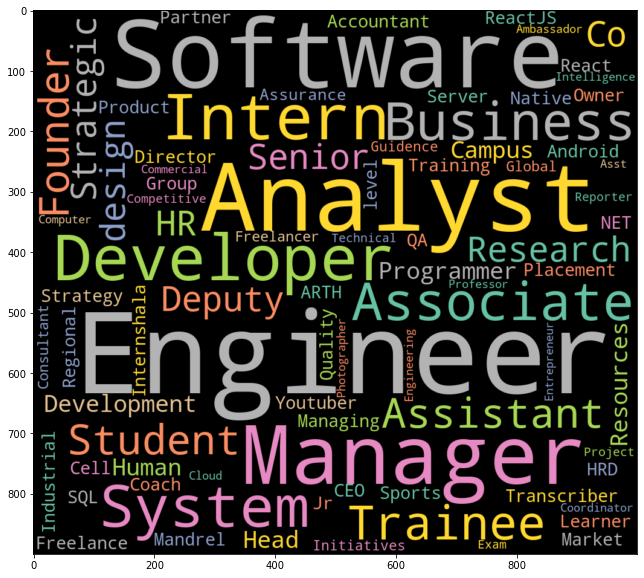

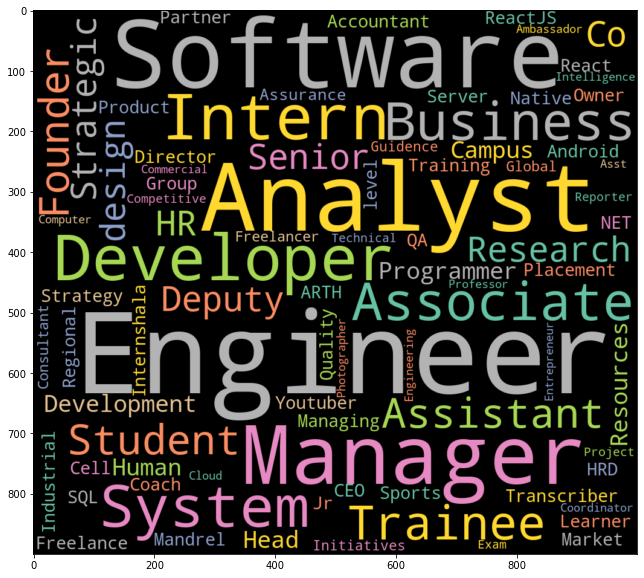

In [85]:
wordcloud=CreateWordCloud(positions)
wordcloud